# Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df.shape

(2000, 8)

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


#### Gender

<Axes: ylabel='Gender'>

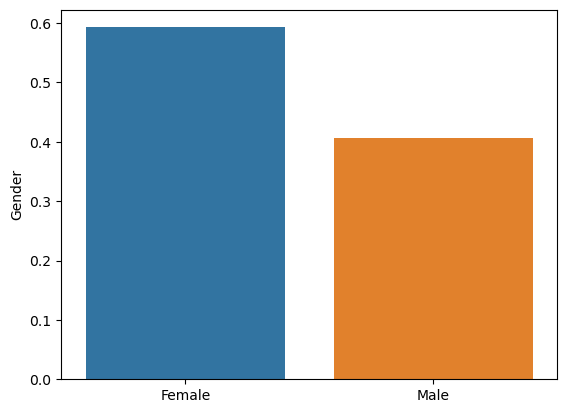

In [5]:
sns.barplot(x=df['Gender'].value_counts().index,
            y=df['Gender'].value_counts(normalize=True))

#### Age

In [7]:
### Age Value
unique_age = df['Age'].unique()
short_unique_age = np.sort(unique_age)
                           
print(short_unique_age)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


* Based on the age data, there are several anomalies.
* At a certain age, such as under 10 years old, it is impossible for someone to become a customer.
* Therefore, I excluded customer data under the age of 10, assuming that individuals above 10 years old could make purchases.

In [8]:
# Drop customers who are less than 10 years old
df = df[df['Age'] > 10].reset_index(drop=True)

Median : 53.0
Mean : 53.81419855795896
Std Dev : 25.615516642275146


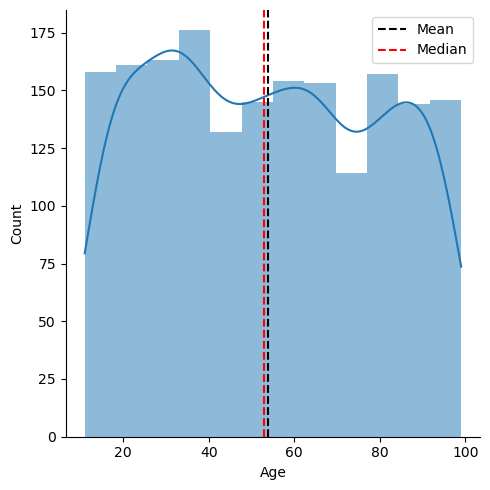

In [9]:
x = df['Age']
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

#### Annual Income

Median : 107794.0
Mean : 109682.29783693844
Std Dev : 46086.39976757418


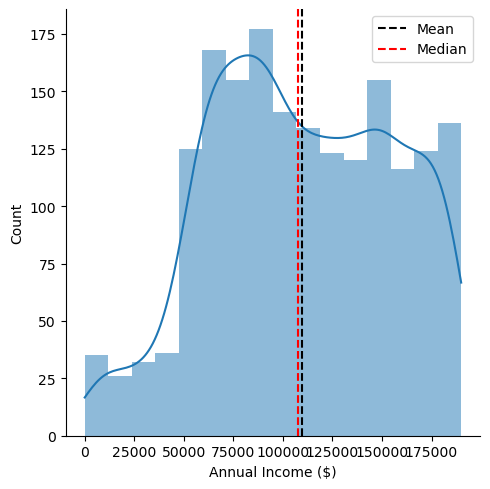

In [10]:
x = df['Annual Income ($)']
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

#### Profession

<Axes: ylabel='Profession'>

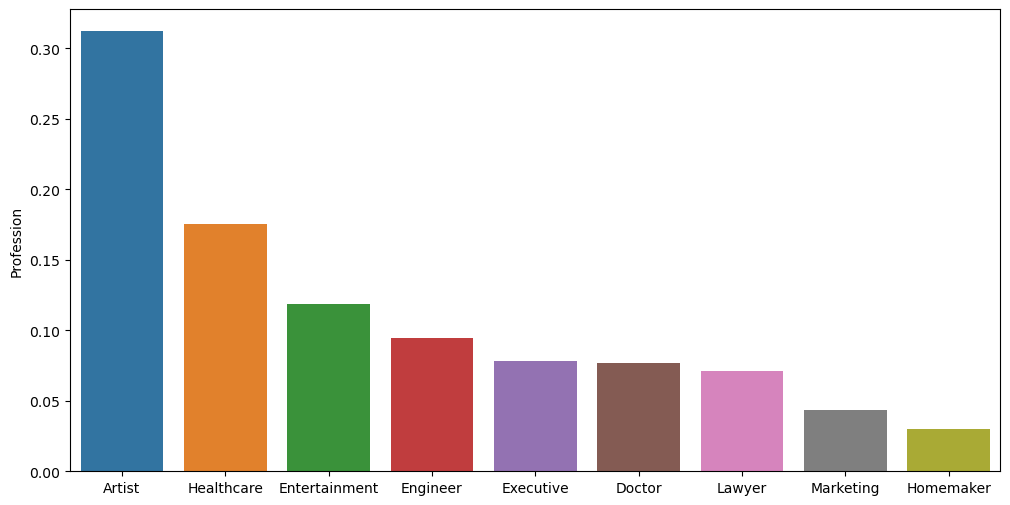

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Profession'].value_counts().index,
            y=df['Profession'].value_counts(normalize=True))

#### Family Size

<Axes: ylabel='Family Size'>

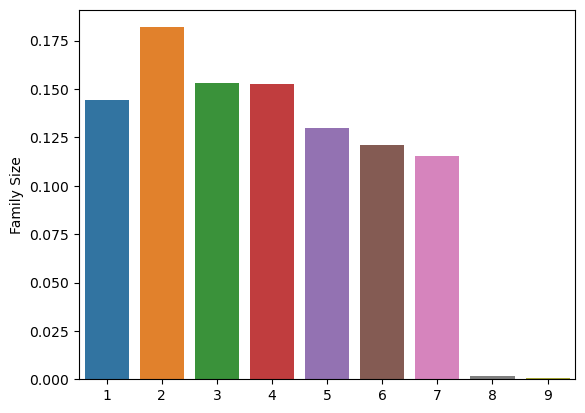

In [12]:
sns.barplot(x=df['Family Size'].value_counts().index,
            y=df['Family Size'].value_counts(normalize=True))

# Feature engineering

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [14]:
# Memilih Feature
df = df[['CustomerID','Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']]

In [15]:
df.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Family Size
0,1,19,15000,39,4
1,2,21,35000,81,3
2,3,20,86000,6,1
3,4,23,59000,77,2
4,5,31,38000,40,6


In [16]:
df.isna().sum().sort_values(ascending=False)

CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Family Size               0
dtype: int64

In [17]:
x = df.iloc[:, [1, 2, 3, 4]].values
label = df.iloc[:,0].values

In [18]:
# Menghitung inersia untuk jumlah kluster yang berbeda
inertia = []
for i in range(1, 11):  # Coba jumlah kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

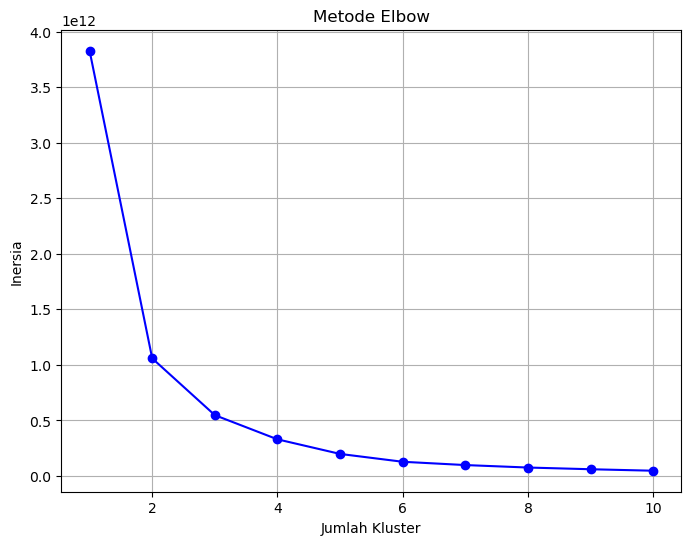

In [19]:
# Plot grafik elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.grid(True)
plt.show()

In [29]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# output = y_kmeans.predict(x)
# print(output)
# y_kmeans.head()
dataframe = pd.DataFrame({"CustomerID":label,  "Cluster":y_kmeans})
dataframe

,CustomerID,Cluster
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1798,1996,0
1799,1997,1
1800,1998,1
1801,1999,0


In [30]:
df['Age'] = df['Age'].astype(str)
df['Family Size'] = df['Family Size'].astype(str)

In [31]:
cluster_Predict = pd.merge(dataframe, df, on='CustomerID')

In [26]:
cluster_Predict

,CustomerID,Cluster,Age,Annual Income ($),Spending Score (1-100),Family Size
0,1,0,19,15000,39,4
1,2,0,21,35000,81,3
2,3,2,20,86000,6,1
3,4,0,23,59000,77,2
4,5,0,31,38000,40,6
...,...,...,...,...,...,...
1798,1996,1,71,184387,40,7
1799,1997,0,91,73158,32,7
1800,1998,2,87,90961,14,2
1801,1999,1,77,182109,4,2


In [32]:
cluster_Predict = cluster_Predict.groupby(['Cluster']).agg({
    'Age': 'median',
    'Annual Income ($)': 'mean', 
    'Spending Score (1-100)': 'mean',
    'Family Size': 'median'
}).reset_index()

In [33]:
cluster_Predict

,Cluster,Age,Annual Income ($),Spending Score (1-100),Family Size
0,0,57.0,150172.145642,51.587156,4.0
1,1,50.0,71758.401719,49.584318,3.0


# Conclusion

* From the results of the Elbow Method that has been conducted, I can determine that the optimal n_cluster is 2.
* From the results of the created clustering, it can be observed that customers in cluster 0 have higher values for age, annual income, expenditure score, and family size compared to those in cluster 2. This implies that customers with higher annual income and larger family sizes tend to shop more.
* Additional information is required to formulate marketing strategies for these two customer segments, including the products they frequently purchase and their shopping behavior.